### Notes:
- train only on the elements in the material?

### To-do:
- documentation: doc strings & code comments
- improve model
    - visualize: https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db
- model tests

In [1]:
import numpy as np
from sklearn import model_selection, metrics
import matplotlib.pyplot as plt

from bandgappypredict.material import Material
from bandgappypredict.bandgappredictions import BandGapPredictions

In [2]:
SiGe = Material(formula="SiGe") #taken from mp-1219182
Si2Ge4 = Material(formula="Si2Ge4")
Si5Ge2 = Material(formula="Si5Ge2")

materials_list = [SiGe,Si2Ge4,Si5Ge2]
band_gap_predictions = BandGapPredictions(materials_list)
band_gap_prediction_objects = band_gap_predictions.band_gap_prediction_objects

C:\Users\emily\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


ridge regression alpha_choice = 0.20506122448979594


C:\Users\emily\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


ridge regression alpha_choice = 0.20506122448979594
ridge regression alpha_choice = 0.20506122448979594


In [10]:
for material, band_gap_prediction_object in band_gap_prediction_objects.items():
    print(f""" 
    {material}
    -----------
    model score: {band_gap_prediction_object.model_score}
    band gap: {band_gap_prediction_object.predicted_band_gap} eV""")

 
    SiGe
    -----------
    model score: 0.292268568955368
    band gap: 0.6754394285526051 eV
 
    Si2Ge4
    -----------
    model score: 0.3121731975704727
    band gap: 0.49235697563656333 eV
 
    Si5Ge2
    -----------
    model score: 0.27587119559940165
    band gap: 0.7922620409813779 eV


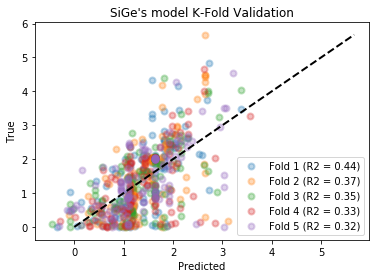

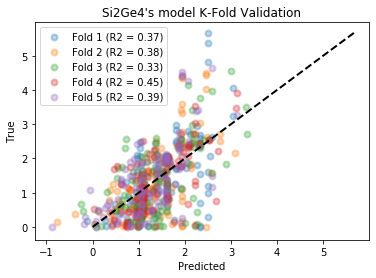

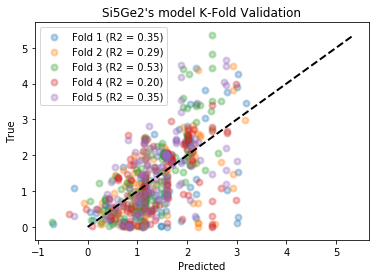

In [11]:
# K fold validation
# https://towardsdatascience.com/machine-learning-with-python-regression-complete-tutorial-47268e546cea
for material, band_gap_prediction_object in band_gap_prediction_objects.items():
    scores = list()
    cv = model_selection.KFold(n_splits=5, shuffle=True)
    fig = plt.figure()
    i = 1

    X_train = band_gap_prediction_object.X_train
    y_train = band_gap_prediction_object.y_train
    model = band_gap_prediction_object.model
    
    for train, test in cv.split(X_train, y_train):
        prediction = model.fit(X_train[train],
                        y_train[train]).predict(X_train[test])
        true = y_train[test]
        score = metrics.r2_score(true, prediction)
        scores.append(score)
        plt.scatter(prediction, true, lw=2, alpha=0.3, 
                    label='Fold %d (R2 = %0.2f)' % (i,score))
        i = i+1
    plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
                linestyle='--', lw=2, color='black')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"{material}'s model K-Fold Validation")
    plt.legend()
    plt.show()